#Import necessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [58]:
start = '2004-01-01'
end = '2024-12-31'

# Download with explicit parameters
df = yf.download('AAPL',start=start,end=end)

df.columns = df.columns.droplevel(1)  # Remove ticker level

# Rename the price level to standard OHLCV
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2004-01-02,0.319777,0.326839,0.318274,0.323833,144642400
2004-01-05,0.333151,0.336456,0.321880,0.321880,395018400
2004-01-06,0.331948,0.336907,0.326239,0.334352,509348000
2004-01-07,0.339462,0.343069,0.329544,0.332099,586874400
2004-01-08,0.351033,0.356593,0.340363,0.343219,460303200


In [59]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2024-12-23,254.655716,255.034791,252.840088,254.156919,40858800
2024-12-24,257.578674,257.588630,254.675658,254.875189,23234700
2024-12-26,258.396667,259.474086,257.010028,257.568678,27237100
2024-12-27,254.974930,258.077462,252.451019,257.209530,42355300
2024-12-30,251.593079,252.889953,250.146571,251.623005,35557500


In [60]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume
0,2004-01-02,0.319777,0.326839,0.318274,0.323833,144642400
1,2004-01-05,0.333151,0.336456,0.321880,0.321880,395018400
2,2004-01-06,0.331948,0.336907,0.326239,0.334352,509348000
3,2004-01-07,0.339462,0.343069,0.329544,0.332099,586874400
4,2004-01-08,0.351033,0.356593,0.340363,0.343219,460303200


In [61]:
df = df.drop(['Date'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,0.319777,0.326839,0.318274,0.323833,144642400
1,0.333151,0.336456,0.321880,0.321880,395018400
2,0.331948,0.336907,0.326239,0.334352,509348000
3,0.339462,0.343069,0.329544,0.332099,586874400
4,0.351033,0.356593,0.340363,0.343219,460303200


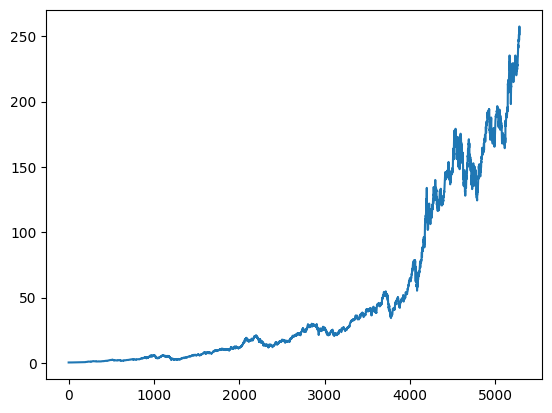

In [62]:
plt.plot(df.Close)

In [63]:
df

,Open,High,Low,Close,Volume
0,0.319777,0.326839,0.318274,0.323833,144642400
1,0.333151,0.336456,0.321880,0.321880,395018400
2,0.331948,0.336907,0.326239,0.334352,509348000
3,0.339462,0.343069,0.329544,0.332099,586874400
4,0.351033,0.356593,0.340363,0.343219,460303200
...,...,...,...,...,...
5279,254.655716,255.034791,252.840088,254.156919,40858800
5280,257.578674,257.588630,254.675658,254.875189,23234700
5281,258.396667,259.474086,257.010028,257.568678,27237100
5282,254.974930,258.077462,252.451019,257.209530,42355300


In [64]:
# moving average of previous 100 days (it will start from 101th day)
ma100 = df.Close.rolling(100).mean()
ma100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
5279,228.001627
5280,228.369080
5281,228.963135
5282,229.491787


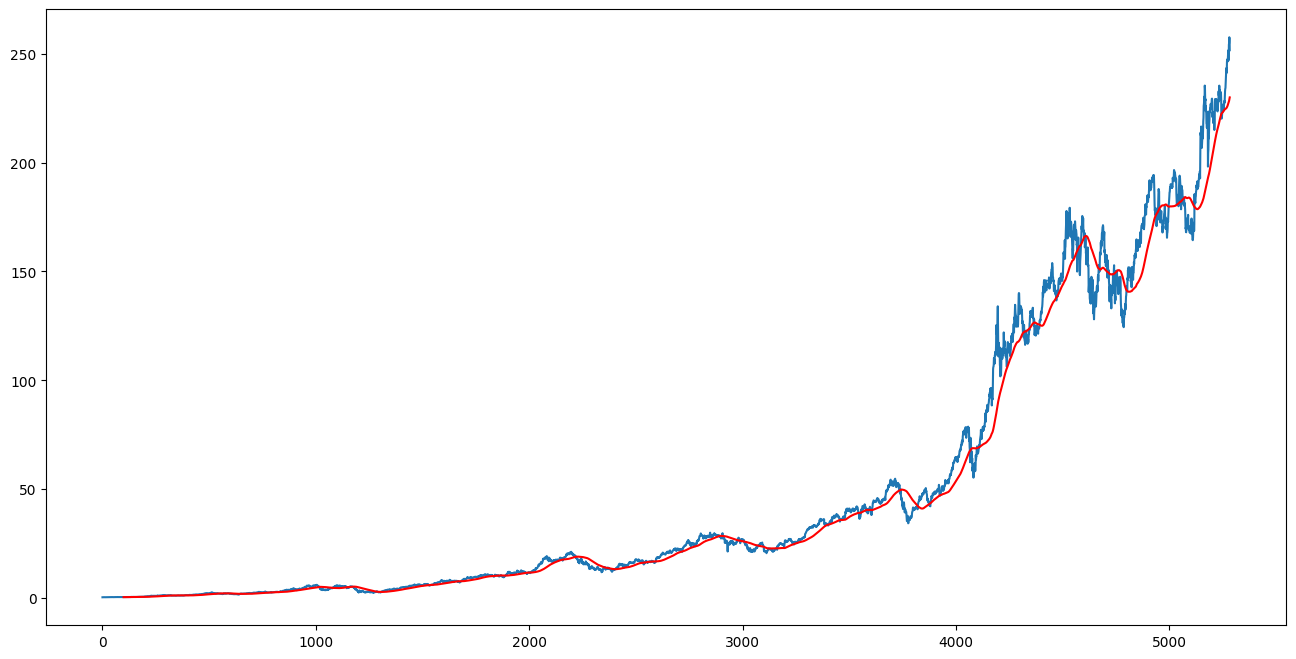

In [65]:
plt.figure(figsize = (16,8))
plt.plot(df.Close)
plt.plot(ma100,'r')
#red line started from 101th day as there is no data of 100 days available for first 100 days

In [66]:
ma200 = df.Close.rolling(200).mean()
ma200

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
5279,210.168765
5280,210.583632
5281,211.010922
5282,211.438306


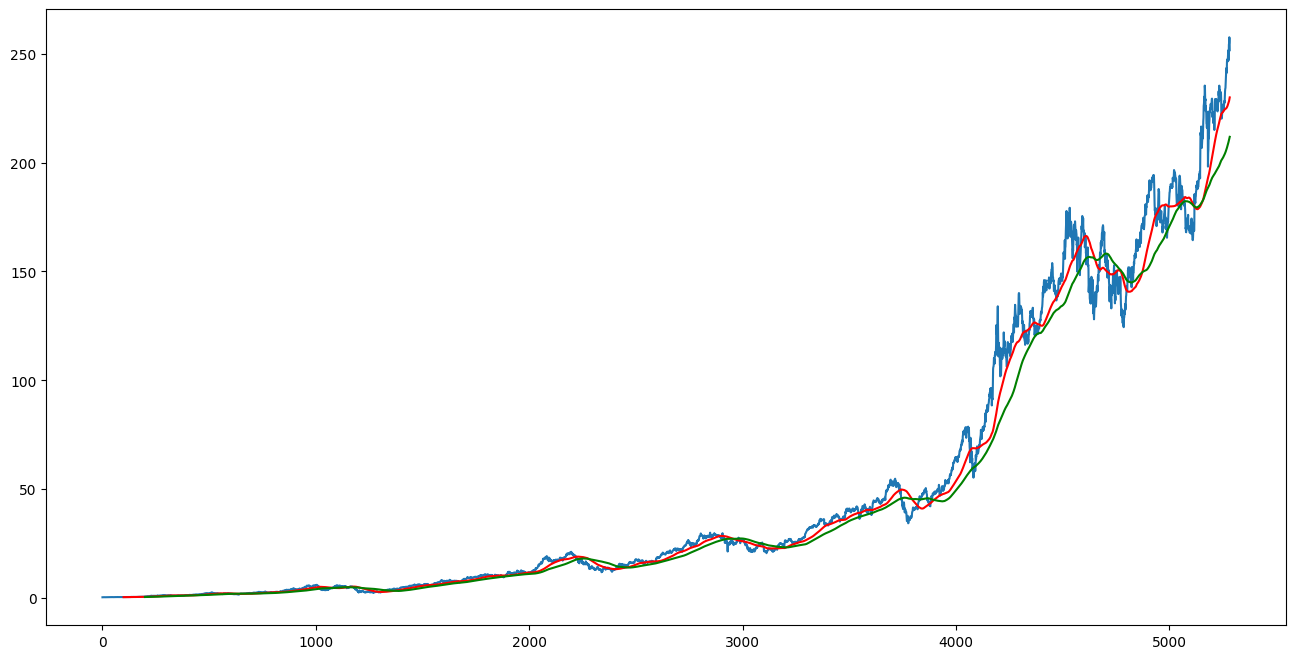

In [67]:
plt.figure(figsize = (16,8))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [68]:
df.shape

(5284, 5)

In [69]:
#Splitting data into training(70%) and testing(30%)

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(3698, 1)
(1586, 1)


In [70]:
data_training.head()

,Close
0,0.323833
1,0.321880
2,0.334352
3,0.332099
4,0.343219


In [71]:
data_testing.head()

,Close
3698,51.751214
3699,53.396256
3700,53.059192
3701,53.588540
3702,52.733970


In [72]:
#Scaling data between 0 and 1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [73]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[3.61458302e-05],
       [0.00000000e+00],
       [2.30813764e-04],
       ...,
       [9.87874943e-01],
       [9.68633663e-01],
       [9.64680086e-01]])

In [74]:
data_training_array.shape

(3698, 1)

In [75]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [76]:
#ML model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [77]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [78]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 47s 334ms/step - loss: 0.0387
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 44s 385ms/step - loss: 0.0038
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 79s 361ms/step - loss: 0.0033
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 44s 388ms/step - loss: 0.0030
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 82s 386ms/step - loss: 0.0026
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 79s 358ms/step - loss: 0.0026
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 44s 383ms/step - loss: 0.0026
Epoch 8/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 39s 346ms/step - loss: 0.0020
Epoch 9/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 47s 399ms/step - loss: 0.0021
Epoch 10/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 78s 365ms/step - loss: 0.0019
Epoch 11/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 80s 354ms/step - loss: 0.0022
Epoch 12/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 40s 352ms/step - loss: 0.0018
Epoch 13/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 39s 335ms/step - loss: 0.0019
Epoch 14/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 38s 333ms/step - loss: 0.0020
Epoch 15/50
113

In [80]:
model.save('keras_model_for_stock_trend_predicton.h5')

In [81]:
data_testing.head()

,Close
3698,51.751214
3699,53.396256
3700,53.059192
3701,53.588540
3702,52.733970


In [82]:
data_testing.tail(100)

,Close
5184,212.117996
5185,211.112701
5186,215.313158
5187,218.242841
5188,219.797394
...,...
5279,254.156919
5280,254.875189
5281,257.568678
5282,257.209530


In [100]:
past_100_days = data_training.tail(100)

In [85]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [86]:
final_df.head()

,Close
0,40.945109
1,40.200493
2,39.312108
3,39.038767
4,38.320056


In [87]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02977491],
       [0.02643988],
       [0.02246094],
       ...,
       [1.        ],
       [0.99839143],
       [0.97337021]])

In [88]:
input_data.shape

(1686, 1)

In [89]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [90]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1586, 100, 1)
(1586,)


In [91]:
# Making Predictions

y_predicted = model.predict(x_test)

50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step


In [92]:
y_predicted.shape

(1586, 1)

In [93]:
y_test

array([0.07817386, 0.08554176, 0.0840321 , ..., 1.        , 0.99839143,
       0.97337021])

In [94]:
y_predicted

array([[0.12700666],
       [0.12821388],
       [0.12935807],
       ...,
       [0.8804445 ],
       [0.88325727],
       [0.88660085]], dtype=float32)

In [95]:
scaler.scale_

array([0.00447885])

In [96]:
scale_factor = 1/0.00447885
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

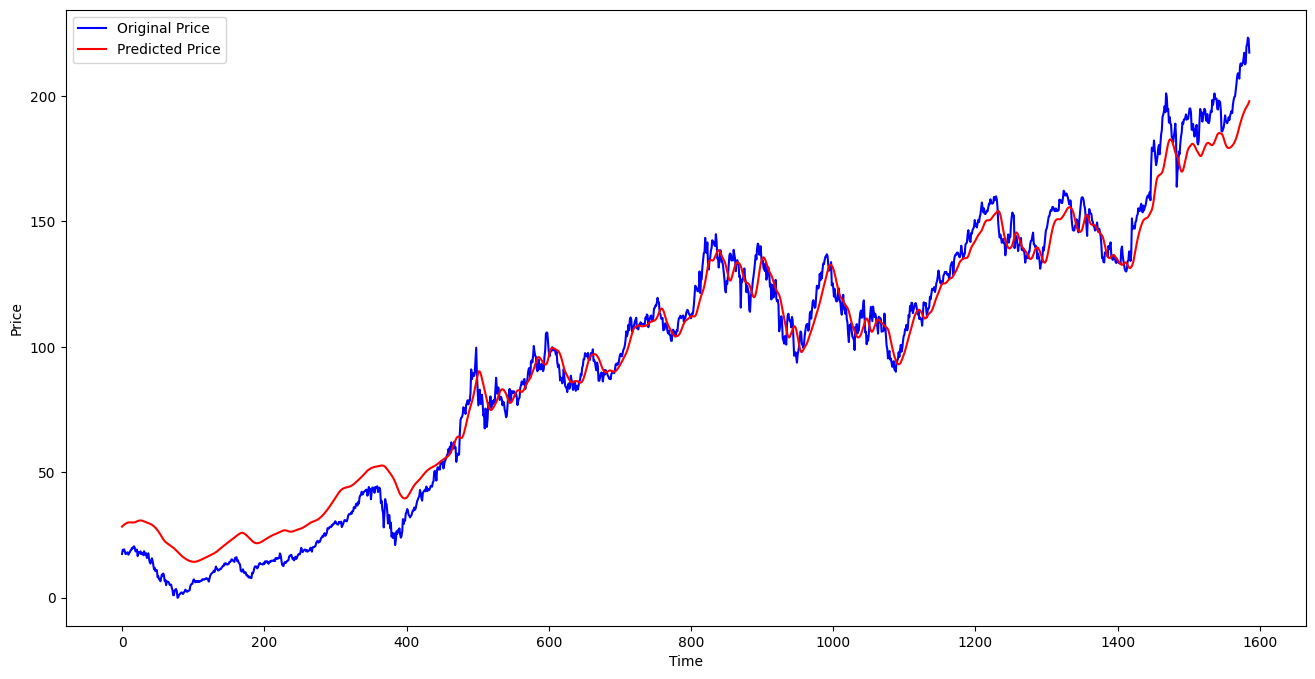

In [99]:
plt.figure(figsize=(16,8))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate metrics
mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_predicted) / y_test)) * 100
r2 = r2_score(y_test, y_predicted)

print("Model Performance Metrics:")
print(f"MAE  (Mean Absolute Error):       {mae:.2f}")
print(f"MSE  (Mean Squared Error):        {mse:.2f}")
print(f"RMSE (Root Mean Squared Error):   {rmse:.2f}")
print(f"R²   (Coefficient of Determination): {r2:.2f}")

Model Performance Metrics:
MAE  (Mean Absolute Error):       7.32
MSE  (Mean Squared Error):        79.71
RMSE (Root Mean Squared Error):   8.93
R²   (Coefficient of Determination): 0.97
